#Importing the Data Manuplation and Linear Algebra Libraries

In [1]:

import pandas as pd
import numpy as np


##Importing the Data Visualization Library

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing the machine Learning Library

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

Loading the Data Sets for better understanding 

In [4]:
hotel_details = pd.read_csv('/content/hotel_details.csv')
hotel_details.head()

,hotel_id,city,country,stars,hotel_rating
0,3202221,Rio de Janeiro,Brazil,0,\N
1,3826522,Hanoi,Vietnam,0,88.8
2,5433480,Rio de Janeiro,Brazil,0,81.66
3,6100572,Miami,USA,4,84.93
4,41209,Stockholm,Sweden,4,81.93


In [5]:
print('Total number of rows is {} and columns is {}'.format(hotel_details.shape[0], hotel_details.shape[1]))


Total number of rows is 1524 and columns is 5


In [6]:
##Duplicate Data Check
hotel_details.hotel_id.duplicated().sum()

0

# Lets dive into the data to check about missing informtion our data

In [7]:
no_nulls = set(hotel_details.columns[hotel_details.isnull().mean()==0])
print('There are {} columns with no missing data'.format(len(no_nulls)))

#Missing columns %
nulls_columns = hotel_details.isnull().mean()*100
columns_with_nan = nulls_columns[nulls_columns > 0]

#Lets checks which columns have more missing data
most_missing_cols = set(hotel_details.columns[hotel_details.isnull().mean() > 0.75])
print('There are {} columns with more than 75% missing data'.format(len(most_missing_cols)))

There are 5 columns with no missing data
There are 0 columns with more than 75% missing data


In [8]:
#Now lets look into number of categorical variables and numerical variables.
cat_df = hotel_details.select_dtypes(include=['object'])
print('There are {} categorical variables in our dataset'.format(cat_df.shape[1]))
cat_df

There are 3 categorical variables in our dataset


,city,country,hotel_rating
0,Rio de Janeiro,Brazil,\N
1,Hanoi,Vietnam,88.8
2,Rio de Janeiro,Brazil,81.66
3,Miami,USA,84.93
4,Stockholm,Sweden,81.93
...,...,...,...
1519,New York,USA,92.28
1520,New York,USA,81.81
1521,Miami,USA,\N
1522,Rio de Janeiro,Brazil,86.49


In [9]:
# to check how many unknown rows in city column

hotel_details['city'].value_counts()["unknown"]



162

In [10]:
hotel_details['country'].value_counts()["unknown"]

162

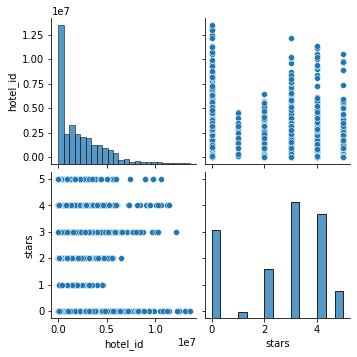

In [11]:
sns.pairplot(hotel_details)

It will show the co-relation between the columns

Now we are using the Other data set hotel_metrics.csv

In [13]:
df_hotel_metrics = pd.read_csv('/content/hotel_metrics.csv')
df_hotel_metrics.head()

,date_ymd,hotel_id,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel
0,20190802,7940,1931,16,0,0.93,168.87,1.63,23.25
1,20190810,7940,931,27,0,1.46,157.94,1.70,22.22
2,20190801,7940,1254,27,1,1.15,194.48,1.78,18.52
3,20190807,7940,1614,36,0,1.19,170.31,2.06,23.50
4,20190806,7940,1748,27,0,1.26,170.61,1.70,21.00


In [15]:
df_hotel_metrics.shape


(9720, 9)

In [16]:
df_hotel_metrics.nunique()

date_ymd                10
hotel_id              1524
impression_count      2416
click_count            207
booking_count            9
avg_cpc                269
avg_clicked_price     8258
avg_length_of_stay     509
avg_time_to_travel    3743
dtype: int64

Key take aways from the above analysis

1) Data Formate of hotel_details 1524 rows and 5 columns, which include
 3 categorical and 2 numerical columns.
2)Data doesnot have missing and null values.
3)we have unknown values in City and Country column is 324.
4) No Duplicates

In Task 3 we will merge both the tables hotel_details and hotel_metrics and do the Pre Processing techniques there.

**Task 2**  Using the dataset clicks.csv, predict the DAILY number of clicks of Sept/2019.

Here we are using the Forecasting Model (Autoregressive Integrated Moving Averages --ARIMA Model) 

The general process for ARIMA models is the following:

1)Visualize the Time Series Data
2)Make the time series data stationary
3)Plot the Correlation and AutoCorrelation Charts
4)Construct the ARIMA Model based on the data
5)Use the model to make predictions

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing       # SES
from statsmodels.tsa.holtwinters import Holt        # Holts Exponential Smoothing
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing   
import statsmodels.graphics.tsaplots as tsa_plots
from datetime import datetime

In [29]:
clicks_df = pd.read_csv('/content/clicks.csv')

In [30]:
clicks_df.head()

,date_ymd,click_count
0,20190101,19712
1,20190102,22632
2,20190103,22579
3,20190104,20716
4,20190105,21953


"""converting date_ymd into proper date"""

In [31]:
clicks_df['date_ymd'] = clicks_df['date_ymd'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [32]:
clicks_df.head()

,date_ymd,click_count
0,2019-01-01,19712
1,2019-01-02,22632
2,2019-01-03,22579
3,2019-01-04,20716
4,2019-01-05,21953


In [33]:
clicks_df.describe()

,click_count
count,242.000000
mean,19723.446281
std,5858.101473
min,7879.000000
25%,15566.000000
50%,18501.000000
75%,22515.750000
max,39550.000000


Step 2: Visualize the Data.
A useful Python function called seasonal_decompose within the 'statsmodels' package can help us to decompose the data into four different components to get clear idea :
 observed , trend , seasonality and residual
"""

In [35]:
# Set the date as index 
data = clicks_df.set_index('date_ymd')

# graphs to show seasonal_decompose using additive model

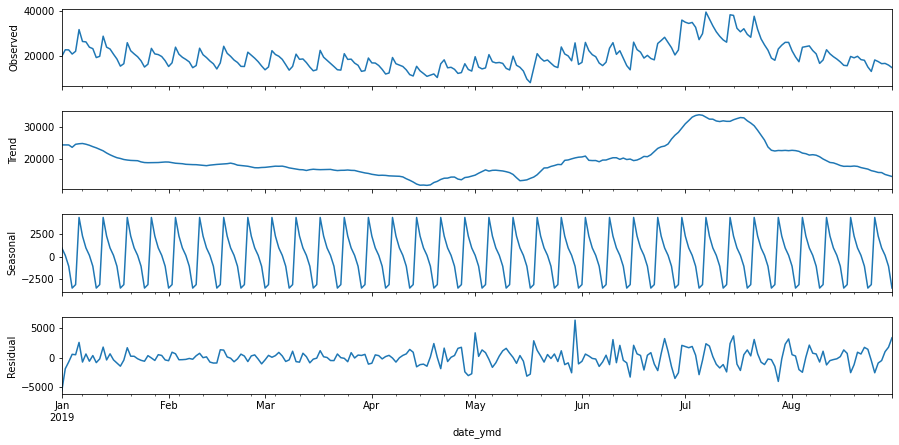

In [39]:
y = data['click_count']
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
seasonal_decompose(y)




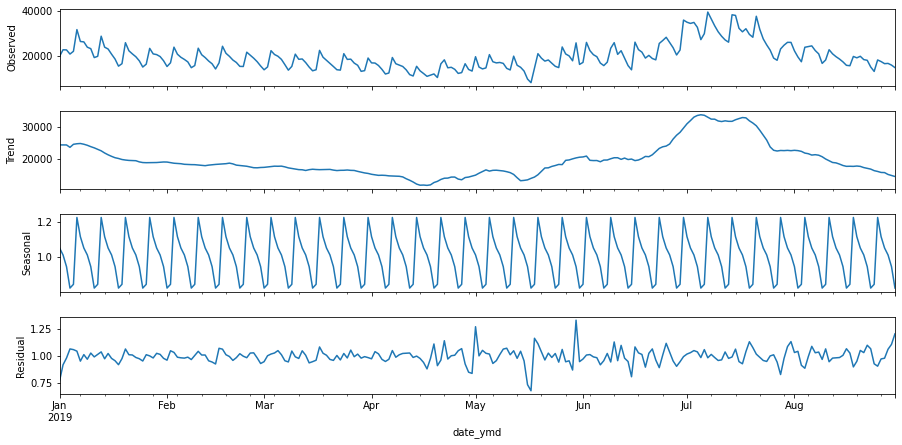

In [41]:
y = data['click_count']
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
seasonal_decompose(y)

In the 8 month of data we cannot see the seaonality. With both the models (additive and Multiplicative) we are not seeing much difference

1) The data set contains values of only 8 months 
2) by looking into the graph we can say that at month 7 to 8 there is sudden increase in the trend and after the trend went down 
3) there is no clear patterns of seasonality in the data


dividing into train and test  recent 30 days are in the test


In [42]:
Train = data.head(212)
Test = data.tail(30)

# Creating a function to calculate the MAPE (mean absolute percentage error)value for test data 

In [43]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [44]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["click_count"]).fit()
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test.click_count)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


36.106670805236284

In [46]:
# Holt method 
hw_model = Holt(Train["click_count"]).fit()
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test.click_count)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


37.53545063954413

So the model is RIGT FIT because test and train are nearly equal

In [47]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["click_count"], seasonal = "add", trend = "add", seasonal_periods = 30).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_add_add, Test.click_count)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


20.788903168510114

In [48]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["click_count"], seasonal = "mul", trend = "add", seasonal_periods = 30).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_mul_add, Test.click_count)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


36.9644542007599

"by this we can say that Holts winter exponential smoothing with additive seasonality and additive trend gives least mape value(20.788903168510114) """


In [49]:
# Final Model on 100% Data
hwe_model_add_add = ExponentialSmoothing(data["click_count"], seasonal = "add", trend = "add", seasonal_periods = 30).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [50]:
# creating new dataset for september month and predicting the values
new_data = pd.DataFrame(pd.date_range(start="2019-09-01",end="2019-10-01").to_pydatetime().tolist())
new_data.head()

,0
0,2019-09-01
1,2019-09-02
2,2019-09-03
3,2019-09-04
4,2019-09-05


In [51]:
type(new_data)

pandas.core.frame.DataFrame

In [57]:
newdata_pred = hwe_model_add_add.predict(start = "2019-09-01", end = "2019-10-01")

newdata_pred

2019-09-01    14779.721972
2019-09-02    13356.811349
2019-09-03    15085.525676
2019-09-04    14257.437161
2019-09-05    14262.661920
2019-09-06    13383.487173
2019-09-07    12559.815870
2019-09-08    12436.918767
2019-09-09    10592.931538
2019-09-10    11686.624038
2019-09-11     9917.945876
2019-09-12     9108.219904
2019-09-13     8498.979460
2019-09-14     7968.760961
2019-09-15     8448.924045
2019-09-16     7166.931391
2019-09-17     8070.798948
2019-09-18     7146.257594
2019-09-19     6653.263534
2019-09-20     5887.389665
2019-09-21     4752.455753
2019-09-22     4849.859603
2019-09-23     4290.702743
2019-09-24     5139.880884
2019-09-25     4328.651428
2019-09-26     4005.936288
2019-09-27     5479.504351
2019-09-28     4453.128667
2019-09-29     4713.217880
2019-09-30     4555.530180
2019-10-01     4621.224049
Freq: D, dtype: float64

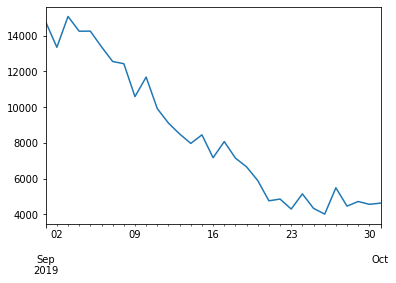

In [58]:
newdata_pred.plot()

Above is the Prediction of data each date of click.
I tried with fbprophet library and using Tableaue also